# Growth of health care cost

First we load our data from the oecd. We will have the "curative cost" per country for a number of years. 

In [22]:
gr <- read.csv2("cc.csv")
head(gr)

Country,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013
Australia,2279.5,2386.6,2484.5,2560.6,2684.0,2694.1,2765.5,2837.1,2873.5,3003.0,2980.2,3082.8,3148.5,NA
Austria,2454.8,2503.2,2564.1,2615.5,2661.7,2689.9,2736.7,2829.9,2898.8,2898.0,2940.5,2962.7,3025.0,3008.5
Canada,2049.8,2149.9,2258.5,2308.0,2363.4,2413.5,2536.9,2585.7,2641.3,2831.8,2914.5,2892.1,2900.6,2907.2
Czech Republic,963.7,1025.0,1097.4,1199.5,1217.6,1278.4,1314.6,1334.3,1436.4,1575.1,1519.3,1565.8,1574.7,1556.9
Denmark,1903.7,1977.5,2050.7,2116.8,2183.7,2245.3,2360.2,2372.2,2403.2,2547.2,2511.0,2485.1,2465.9,2446.9
Estonia,555.4,542.2,571.9,635.0,703.3,748.6,824.7,911.7,980.7,968.5,921.6,928.4,991.1,1036.1


You see that R added 'X' before the years. In this case, this is quite handy because we want to manipulate the data. E.g. if we would like to divide value in the year 2013 by the value in the year 2000, R would think you the numbers in stead of the values.

If you don't want the x-s, you can use the command check.names=FALSE to prevent that. As an example:

In [40]:
exampledata <- read.csv2("cc.csv", check.names=FALSE)
head(exampledata)

Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Australia,2279.5,2386.6,2484.5,2560.6,2684.0,2694.1,2765.5,2837.1,2873.5,3003.0,2980.2,3082.8,3148.5,NA
Austria,2454.8,2503.2,2564.1,2615.5,2661.7,2689.9,2736.7,2829.9,2898.8,2898.0,2940.5,2962.7,3025.0,3008.5
Canada,2049.8,2149.9,2258.5,2308.0,2363.4,2413.5,2536.9,2585.7,2641.3,2831.8,2914.5,2892.1,2900.6,2907.2
Czech Republic,963.7,1025.0,1097.4,1199.5,1217.6,1278.4,1314.6,1334.3,1436.4,1575.1,1519.3,1565.8,1574.7,1556.9
Denmark,1903.7,1977.5,2050.7,2116.8,2183.7,2245.3,2360.2,2372.2,2403.2,2547.2,2511.0,2485.1,2465.9,2446.9
Estonia,555.4,542.2,571.9,635.0,703.3,748.6,824.7,911.7,980.7,968.5,921.6,928.4,991.1,1036.1


We use dplyr to manipulate the data.

In [23]:
library(dplyr)

We will first get a dataset without the NA's. So we have a dataframe with complete cases

In [24]:
gr <- gr %>%
na.omit()
head(gr)

,Country,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013
2,Austria,2454.8,2503.2,2564.1,2615.5,2661.7,2689.9,2736.7,2829.9,2898.8,2898.0,2940.5,2962.7,3025.0,3008.5
3,Canada,2049.8,2149.9,2258.5,2308.0,2363.4,2413.5,2536.9,2585.7,2641.3,2831.8,2914.5,2892.1,2900.6,2907.2
4,Czech Republic,963.7,1025.0,1097.4,1199.5,1217.6,1278.4,1314.6,1334.3,1436.4,1575.1,1519.3,1565.8,1574.7,1556.9
5,Denmark,1903.7,1977.5,2050.7,2116.8,2183.7,2245.3,2360.2,2372.2,2403.2,2547.2,2511.0,2485.1,2465.9,2446.9
6,Estonia,555.4,542.2,571.9,635.0,703.3,748.6,824.7,911.7,980.7,968.5,921.6,928.4,991.1,1036.1
7,Finland,1511.5,1587.4,1696.7,1792.6,1880.3,1969.0,2018.6,2048.8,2119.3,2119.3,2179.4,2239.0,2269.8,2310.6


The Netherlands changed the health care system in 2006. So we want to compare the growth of all countries in the period 2000-2005 with the growth in the period 2006-2013.

In [36]:
gr1 <-gr %>%
mutate(growth_period_2000_2005 = ((X2005/X2000)^(1/5)-1) * 100) %>%
mutate(growth_period_2006_2013 = ((X2013/X2006)^(1/7)-1) * 100) %>%
select(Country, growth_period_2000_2005, growth_period_2006_2013)

gr1

Country,growth_period_2000_2005,growth_period_2006_2013
Austria,1.846006,1.3618875
Canada,3.320658,1.9654594
Czech Republic,5.814450,2.4460690
Denmark,3.355876,0.5166954
Estonia,6.152149,3.3137092
Finland,5.430803,1.9487890
Germany,1.428288,2.4886797
Korea,3.737120,4.2662583
Netherlands,8.001258,2.5292812
Switzerland,3.143572,2.4846486


To make a plot we need to load the package ggplot2. We will also load the package ggrepel.

ggrepel implements functions to repel overlapping text labels away from each other and away from the data points that they label. The algorithm works as follows:
For each box:
* Move the box into the allowed plotting area.
* If the bounding box overlaps other boxes:
* Repel the overlapping boxes from each other.
* If the bounding box overlaps data points:
* Repel the box away from the data points.
* Repeat until all overlaps are resolved, up to a preset limit of iterations





In [38]:
library(ggrepel)
library(ggplot2)

Now can make the plot. We want to make a scatterplot, with the growth in the period 2000-2005 on the x-axis and the growth in the period 2006-2013 on the y-axis. We want to have the names of the countries connected to our points. We can use geom_text for that. To prevent overlapping of the texts we use ggrepel.

Furthermore,we want to include a line with a slope of 45 degrees. This would indicate that countries south east of the line have lower growth in the second period than in the first period. geom_abline adds this line.

To prevent that the users get confused with different scales of the axis, we impose the same scale on both axes with xlim and ylim.

xlab and ylab will give us nice names on the axes.


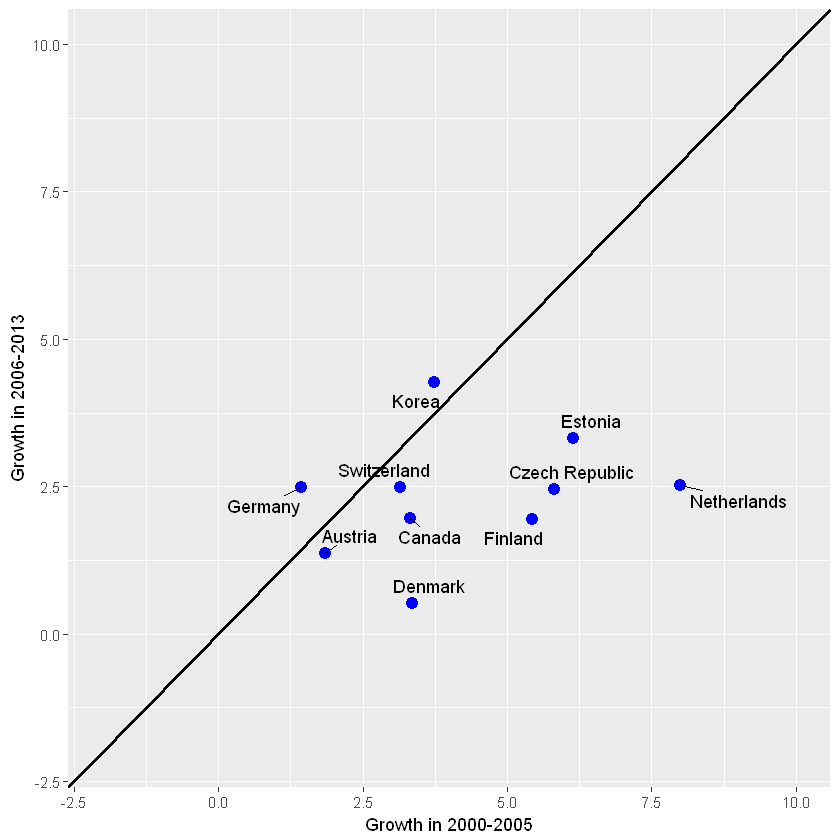

In [39]:
ggplot(gr1, aes(x=growth_period_2000_2005, y=growth_period_2006_2013)) +
  geom_point(colour = "blue", size = 3) +  xlab("Growth in 2000-2005")+
  ylab("Growth in 2006-2013") +
  geom_abline(intercept =0, slope = 1, size = 1) +
  ylim(-2,10)+ xlim(-2,10)+
  geom_text_repel(aes(label = Country), 
                  box.padding = unit(0.45, "lines"))



